# Parkisons Disease Detection using Machine Learning

The project will make use of Machine Learning techniques to detect Parkinson's Disease cases. 
Tasks include:

* Data Preprocessing
* Exploratory Data Analysis
* Dataset Balancing & Scaling
* Machine Learning Models Training & Evaluation

Machine Learning Models Trained & Evaluated
Here are the Machine Learning models that were trained and evaluated:
* Decision Tree Classifier
* Logistic Regression
* Support Vector Machine Classifier
* Naive Bayes Classifier
*XGBoost Classifier

## Importing Libraries

In [6]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

from IPython.display import display
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from xgboost import XGBClassifier


## Reading the data
The data is a csv file 

In [7]:
# Read the data file
df= pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
# also look at the tail to look if data is correct
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


# Data Preprocessing
We need to preprocess the dataset before we can use it. We look for redundant columns, check for duplicate rows, check for missing values and have to normalize the data. We have to do this because the model needs clean data to work with. It also needs data in the range of [0, 1] because it can learn better.
In addition,column name, is a Redundant column which is not useful for Analysis or Machine Learning, and will be dropped from the dataframe.

## The following steps are performed on the dataset in this section:

##### Dropping Redudant Columns


##### Checking For Duplicated Rows

##### Checking For Missing Values

In [9]:
#getting the shape of data
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [10]:
# Dropping The Name Column. we donot need this column for our model
df.drop(['name'], axis=1, inplace=True)

In [11]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [12]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [13]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Data has different scales (std) so should be normalized.

We can see that the status column has a datatype of int64. Because this column only contains two numeric values 0 and 1, we will convert it to Uint8 to save memory.

In [14]:
#column Status is int64 datatype and it countains just  numeric values 0 & 1,
#for saving memory here Im changing datatype to uint8
df['status'] = df['status'].astype('uint8')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [16]:
#Now,checking Dataset For Duplicate Rows
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


As there is no Duplicate Rows

In [17]:
#Now,
# Checking For Missing Values In Dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Exploratry Data Analysis
We can explore the data to look at the distribution and see if there are highly correlated features that can be removed.
The visualization is with respect to the target variable 'status':

<AxesSubplot:xlabel='status', ylabel='count'>

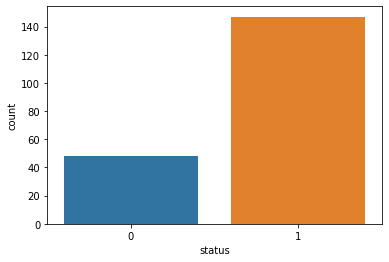

In [18]:
### As we see here there is no missing value
### we check if our data is balance
sns.countplot(x='status',data=df)


The barplot shown (above) clearly shows that most of the observations given in the dataset have a status of 1 i.e most of the people's represented in the dataset have been prone to parkinsons disease. This could also create a bias in the model.

1 ----> Parkinson's Posetive
0 ----> Healthy


<AxesSubplot:>

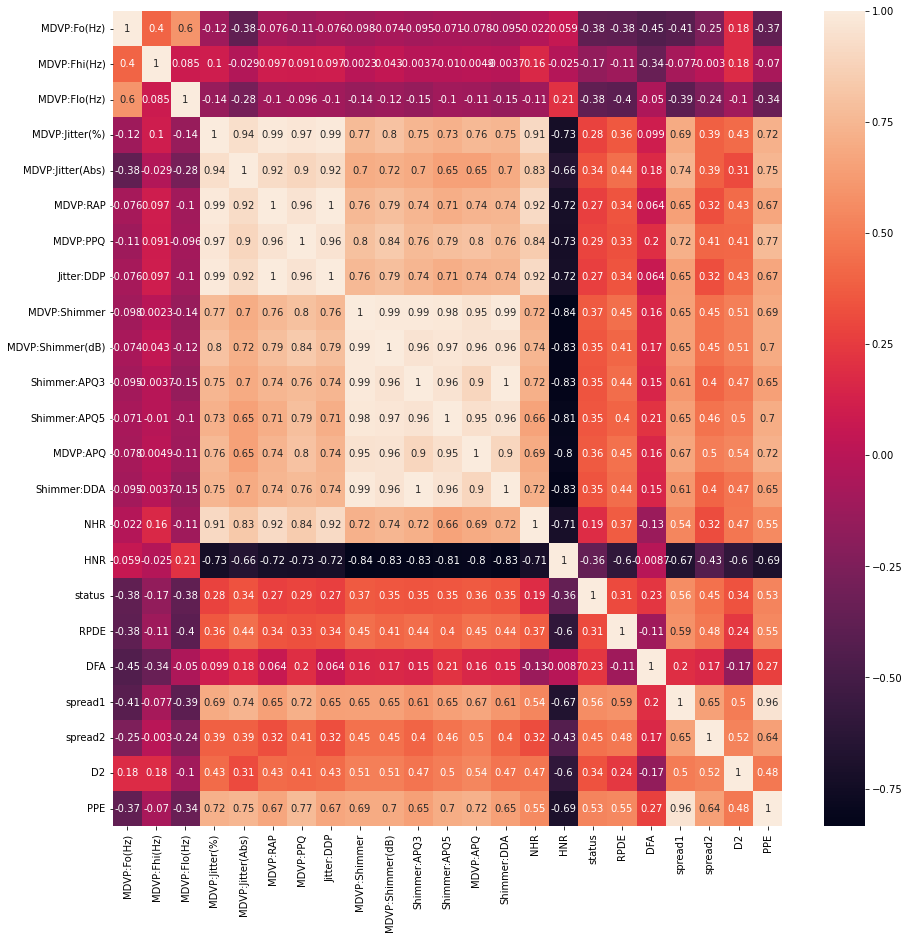

In [19]:
# we check if there is correlation between features
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(),annot=True,ax=ax)

As we can see from the Heatmap correlation, many independent features are highly correlated with one another. This is good to know, we can keep features that are not heavily correlated.


In [20]:
len(df.columns)-1

22

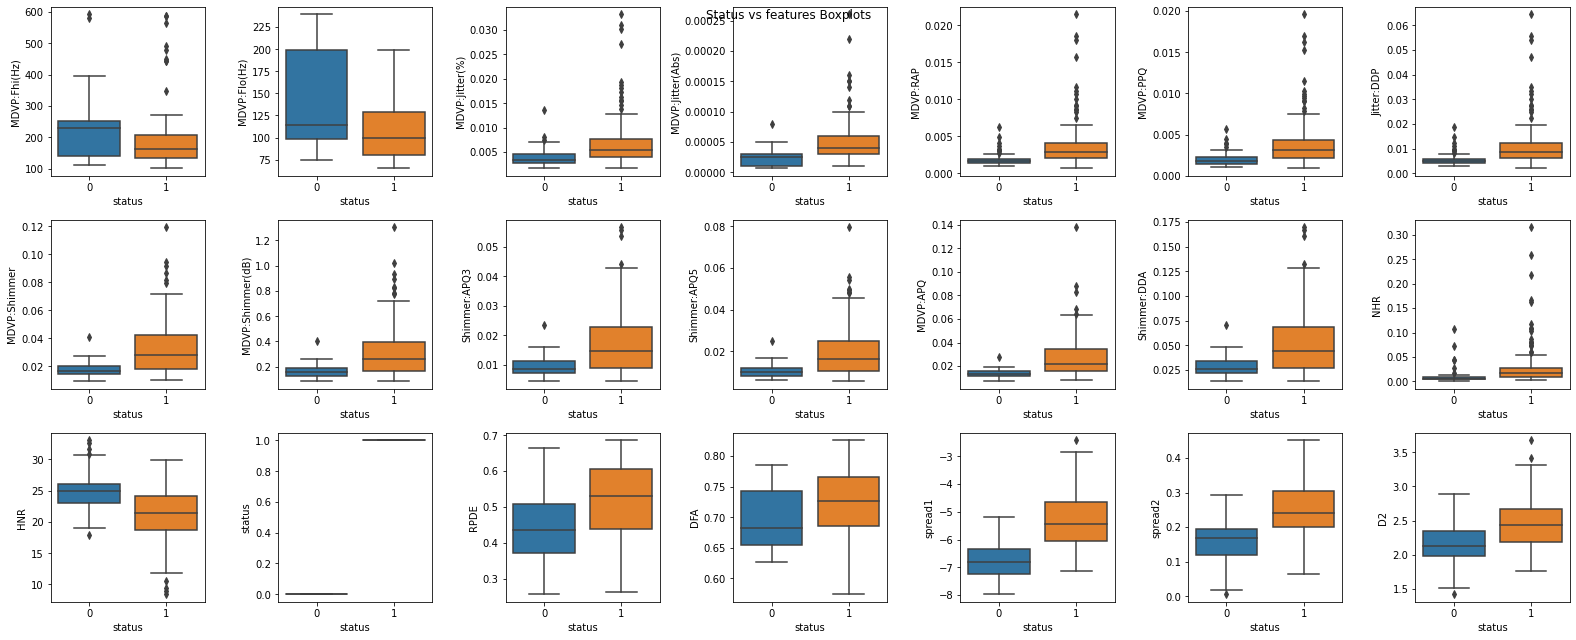

In [21]:
#Box Plot
fig,axes=plt.subplots(3,7,figsize=(22,9))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i-1])
plt.tight_layout()
fig.suptitle('Status vs features Boxplots')
plt.show()

 On the boxplot shown, it is very evident that patients with parkinson's diseasehave  a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' here. 
Features which boxes do not overlap in their range are probably features which could be helpful to separate the 2 classes.



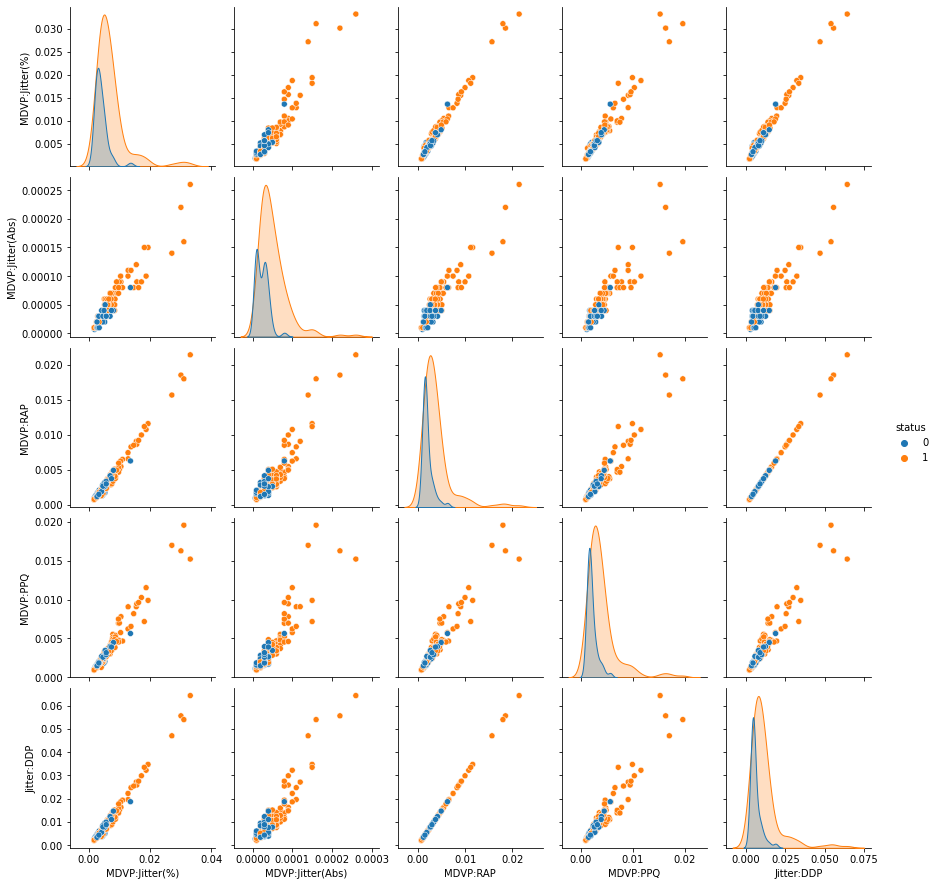

In [22]:
# we will check again the correlation of features to eachother, and also the normality of variablesplt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

Based on the above pair plot, we can see that all of these fundamental frequencies are highly correlated.

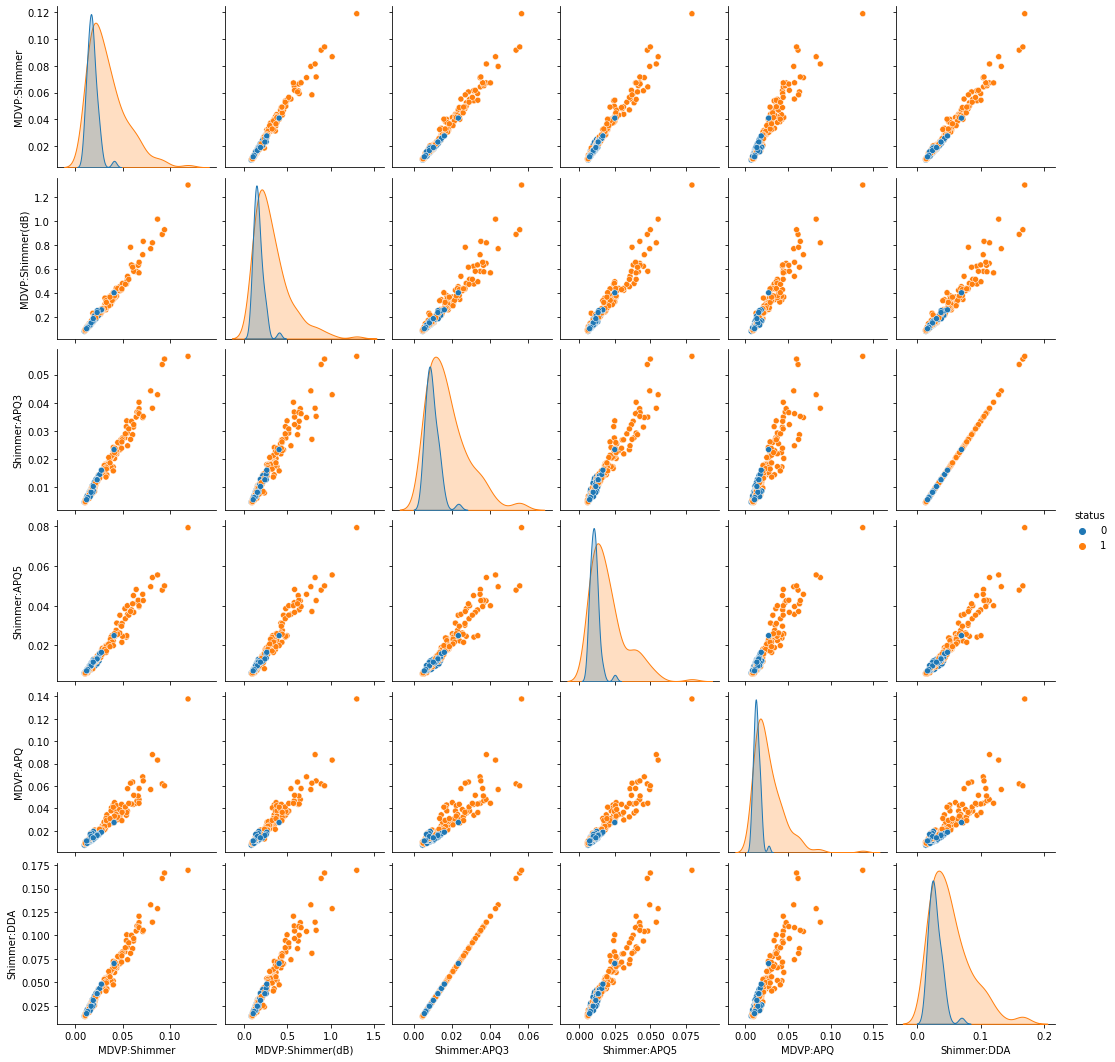

In [23]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

We can see from the above pair plots that all of these variations in amplitude are highly correlated with each other.

# Balancing Dataset
Here as we can find out the Dataset is Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Then, here we SMOTE to Oversample and Balance the dataset. We assume that the model will be able to learn easier if the dataset is balanced.

In [25]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [26]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [28]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [29]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [30]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


<AxesSubplot:xlabel='status', ylabel='count'>

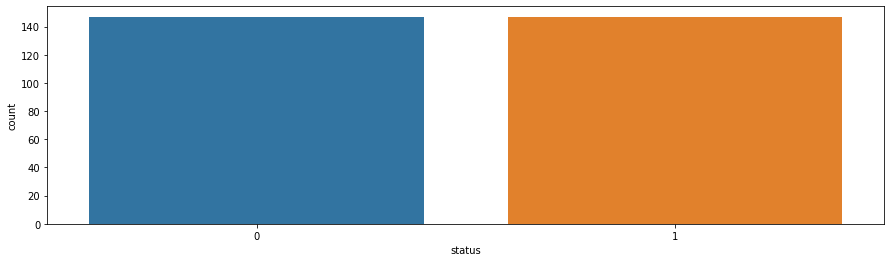

In [31]:
sns.countplot(x=y)

In [32]:
# Scaling features between -1 and 1  for mormalization 
scaler = MinMaxScaler((-1,1))

In [33]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [34]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Machine Learning Model Training
It is good to use several machine learning models. Every machine learning model has it's own strength.

##### Now we want to use  Machine Learning Models for training the data:

*Decision Tree Classifier*: it is good at classifying using a tree. It can lead to overfitting.

*Logistic Regression*: good for binary classification.

*SVM*: can linearly separate data using higher dimensions.

*Naive Bayes*: a probabilistic frameowrk

*XGBoost Classifier*: one of the best models.

## Decision Tree Classifier

In [35]:
#Decision Tree Classifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.86      0.92      0.89        26

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In General if we have  imbalanced dataset , we  probably would be prefare to assign a greater contribution to classes with more examples.Although in  balanced dataset its more understandable metric for overall performance regardless of the class. Then we ,can go with accuracy, which is essentially our micro F1 score.


 As we can see here the accuracy its not great but in comparisson with other models its Good 92%

We can also use GridSearch to find the optimal hyperparameters for the classifier.

In [36]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)
import warnings
warnings.simplefilter("ignore")

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [37]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 120}

In [38]:
dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



As we can see DecisionTree is a accurate model for classification of parkinson data. It has an accuracy and f1 score of 0.93.

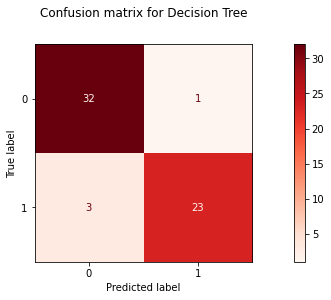

In [39]:
plot_confusion_matrix(dt1, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

Based on ConfusionMatrixDisplay our model is accurate because the rate of False Negative and False Posetive are too low just 4. However, we misclassify 3 people with parkinson. They are false negatives.

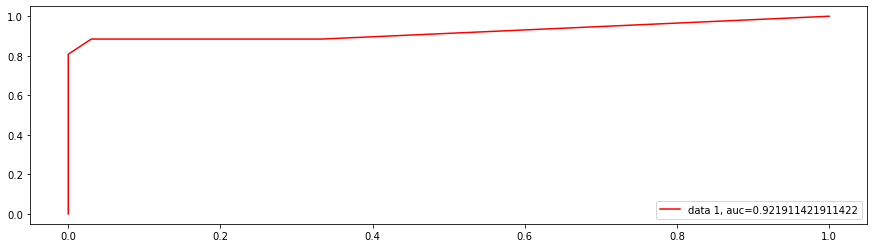

In [40]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), c="r")
plt.legend(loc=4)
plt.show()

'''The Area Under the Curve (AUC) measures how well a classifier can distinguish between classes and provides a summary of the ROC curve.
AUC indicates how well a model can distinguish between positive and negative classes.
https://www.analyticsvidhya.com 
'''


As we can see here in plot above the AUC is close to 1 and it showes in this model is quite nice

In [41]:
# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')

['dt_clf.pkl']

## Logistic Regression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [43]:

print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix:


array([[31,  2],
       [ 8, 18]], dtype=int64)

Based on the outcomes The accuracy is not good enough then Logistic Regression is not a good model with 83% accuracy

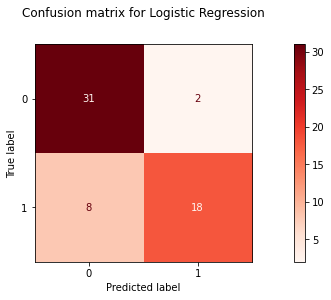

In [44]:
plot_confusion_matrix(logmodel, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

 Here we see they are more false negative  rather than the other models and the accuracy its not good enough though that coul not be a good model in our case

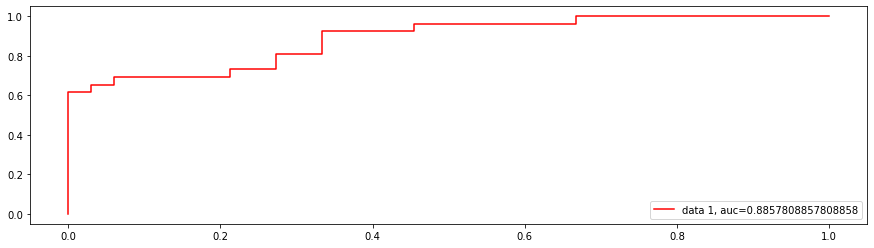

In [45]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), c="r")
plt.legend(loc=4)
plt.show()

 As we can see here in plot above the AUC is 85% which shows the model is not good enough

In [46]:
# Dumping Logistic Regression Model
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

## SVM


In [47]:
# SVM With Linear Kernel
#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8135593220338984
Train Set Accuracy: 0.8638297872340426


In [48]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(probability=True), param_grid, scoring='f1', verbose = 3,)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning 
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
# print classification report 
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.809 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.694 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ......C=1, gamm

[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.676 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.676 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.676 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.676 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.694 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=100, gam

 As we can see here In SVM model the  accuracy 97% and its really good 

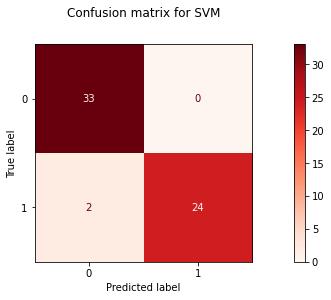

In [49]:
plot_confusion_matrix(grid_SVC, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

Bsed on plot_confusion_matrix above we can see there are only 2 false prediction . This model performs very good and is able to classify most patients correctly.

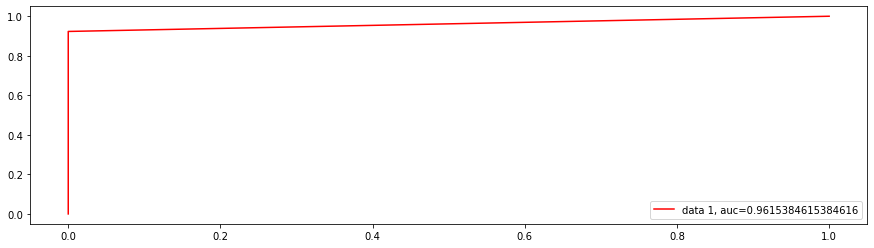

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc),c="r")
plt.legend(loc=4)
plt.show()

The Above plot illustrate the AUC 96% wich is very good 

In [51]:
# Dumping SVM Classifier
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

## Naive Bayes

In [52]:

# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



In [53]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[32,  1],
       [13, 13]], dtype=int64)

In [54]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.27118644067797


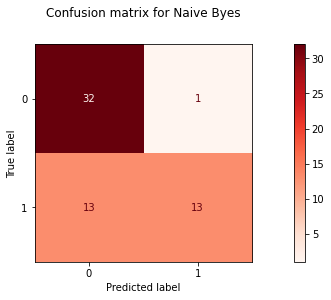

In [55]:
plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Confusion matrix for Naive Byes', y=1.1)
plt.show()

Based on confusion_matrix above and the prediction 13 false negative, the model is weak in predicting class 1. This model is not performing well.

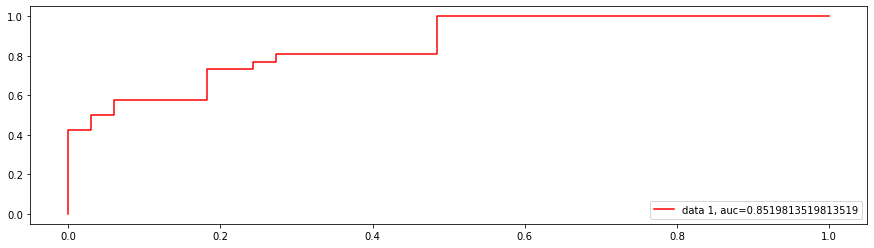

In [56]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc),c="r")
plt.legend(loc=4)
plt.show()

Here the plot shows AUC is 85% and its not good enough

In [57]:
# Dumping Naive Bayes Classifier
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

## XGBoost Classifer
Because my integrated omics project uses XGBoost for prediction of gut microbiota, I wanted to use it here to train a XGBoost classifier for classification of Parkinson's cases or not. The following parameters have been optimized for XGBoost:

Max Depth: This value is used to determine the Maximum Depth of the Tree.
ETA : This is also known as Learning Rate.
Reg_Lambda : This is the L2 Regularization for the weights.
Random State : This is used to evaluate and determine the performance of the model based on different random states.
The Parameter Optimization has been performed using GridSearchCV with the following parameters:


Scoring Parameter: F1 Score

Cross Validation: 3

In [66]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [67]:
clf = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [68]:
print('Best Score :', clf.best_score_)
print('Best Parameters :', clf.best_params_)

Best Score : 0.9465464212299656
Best Parameters : {'eta': 0.4, 'max_depth': 7, 'random_state': 300, 'reg_lambda': 1.2}


In [70]:
# Extracting Best Classifier From GridSearchCV
xgb_clf = clf.best_estimator_

In [71]:
# Evaluating Performance on Train Set
pred = xgb_clf.predict(X_train)
print('For Train Set')
print('Accuracy :', metrics.accuracy_score(y_train, pred))
print('Precision :', metrics.precision_score(y_train, pred))
print('Recall :', metrics.recall_score(y_train, pred))
print('R2 Score :', metrics.r2_score(y_train, pred))

For Train Set
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R2 Score : 1.0


In [72]:
# Evaluating Performance on Train Set
# Evaluating Performance on Train Set
predXGB = xgb_clf.predict(X_test)
print('For Test Set')
print('Accuracy :', metrics.accuracy_score(y_test, predXGB))
print('Precision :', metrics.precision_score(y_test, predXGB))
print('Recall :', metrics.recall_score(y_test, predXGB))
print('R2 Score :', metrics.r2_score(y_test, predXGB))

For Test Set
Accuracy : 0.9152542372881356
Precision : 0.8620689655172413
Recall : 0.9615384615384616
R2 Score : 0.6561771561771561


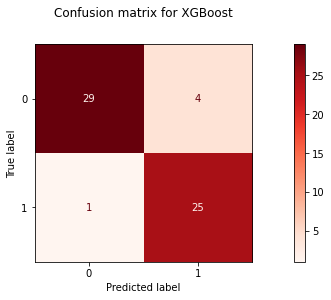

In [73]:
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()

 As the plot of confusion matrix showes the prediction is quite good. It does overfit on the train data but only has 1 false negative. This is great. It also has a high accuracy.

In [74]:
# Dumping XGBoost Classifier
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']

## Comparision Table

In [77]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'XGB':[accuracy_score(y_test, predXGB), f1_score(y_test, predXGB), recall_score(y_test, predXGB), precision_score(y_test, predXGB), r2_score(y_test, predXGB)]
}
chart = pd.DataFrame(chart)

In [78]:
display(chart)

,Metric,DT,LR,SVM,NB,XGB
0,Accuracy,0.932203,0.830508,0.966102,0.762712,0.915254
1,F1-Score,0.920000,0.782609,0.960000,0.650000,0.909091
2,Recall,0.884615,0.692308,0.923077,0.500000,0.961538
3,Precision,0.958333,0.900000,1.000000,0.928571,0.862069
4,R2-Score,0.724942,0.312354,0.862471,0.037296,0.656177


## Voting classifier

In [79]:
hard_evc = VotingClassifier(estimators = [('logmodel', logmodel), ('xgb_clf',xgb_clf), ('clf', clf),('gnb', gnb),
                                     ("grid_SVC", grid_SVC)], voting = 'hard')
hard_evc.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 tot

[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.766 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.810 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.870 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.889 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.857 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.809 total time=   0.0s
[CV 3/5] END .......C=1, gam

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.694 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.676 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.676 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.676 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.844 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.837 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ....C=10, gamma

VotingClassifier(estimators=[('logmodel', LogisticRegression()),
                             ('xgb_clf',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.4,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_const...
                                           param_grid={'eta': [0.1, 0.2, 0.3,
                                                               0.4, 0.5],
                                                       'max_depth': range(4, 8),
                                                       'random_state': [300,
                                                                        600,
                                                                        900],
                                                       'reg_lambda': [0.8, 0.9,
                                                                      1, 1.1,
                                                                      1.2]},
                                           scoring='f1', verbose=1)),
                             ('gnb', GaussianNB()),
                             ('grid_SVC',
                              GridSearchCV(estimator=SVC(probability=True),
                                           param_grid={'C': [0.5, 1, 10, 100],
                                                       'gamma': [1, 0.1, 0.01,
                                                                 0.001,
                                                                 0.0001],
                                                       'kernel': ['linear',
                                                                  'rbf',
                                                                  'poly']},
                                           scoring='f1', verbose=3))])

In [81]:
def evaluate(y_test, y_pred, X_test, clf):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

##### y_pred = hard_evc.predict(X_test)
evaluate(y_test, y_pred, X_test, hard_evc)

Hard voting entails picking the prediction with the highest number of votes.
Soft voting entails combining the probabilities of each prediction in each model and picking the prediction with the highest total probability.

In [82]:
from sklearn.ensemble import VotingClassifier
# logmodel = LogisticRegression()
# rnd_clf = RandomForestClassifier()
# svm = SVC()

soft_evc = VotingClassifier(estimators = [('logmodel', logmodel), ('xgb_clf',xgb_clf), ('clf', clf),
                                          ('gnb', gnb),("grid_SVC", grid_SVC)], voting = 'soft')
soft_evc.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 tot

[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.694 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.676 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.889 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.857 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0

[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.676 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=100, g

VotingClassifier(estimators=[('logmodel', LogisticRegression()),
                             ('xgb_clf',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.4,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_const...
                                           param_grid={'eta': [0.1, 0.2, 0.3,
                                                               0.4, 0.5],
                                                       'max_depth': range(4, 8),
                                                       'random_state': [300,
                                                                        600,
                                                                        900],
                                                       'reg_lambda': [0.8, 0.9,
                                                                      1, 1.1,
                                                                      1.2]},
                                           scoring='f1', verbose=1)),
                             ('gnb', GaussianNB()),
                             ('grid_SVC',
                              GridSearchCV(estimator=SVC(probability=True),
                                           param_grid={'C': [0.5, 1, 10, 100],
                                                       'gamma': [1, 0.1, 0.01,
                                                                 0.001,
                                                                 0.0001],
                                                       'kernel': ['linear',
                                                                  'rbf',
                                                                  'poly']},
                                           scoring='f1', verbose=3))],
                 voting='soft')

In [83]:
y_pred = soft_evc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



Based on VotingClassifier as we can see  hard voting accuracy is 85% and soft voting accuracy is 90% which is showes better accuracy

# Conclusion

In general we can see that the XGboost classifier has the highest recall. This is important because we do not want to classify parkinson patients as healthy people. We want to detect parkinson. The SVM has the highest accuracy itself and a high F1 score. It would be great to have the recall of the XGboost classifier and the accuracy of the SVM. The rest of the models do not perform as well.

As a future direction we can use neural network to predict when someone has parkinson. We can also gather more data to more accurately predict who has parkinsons disease. We can also try other preprocessing techniques to obtain more data representations. This can also work and maybe other models perform better with it. We can also use cross validation.

In this notebook I was able to create a model that can predict Parkinsons disease. Hopefully in the future we are able to always detect it.